[Link to colab](https://colab.research.google.com/github/lsmin0152/cheb301/blob/main/notebooks/CHEB301_F25_12_Regularization.ipynb)

## **Simple Principles for Regularization**

# **Regularization**

Inclusion of regularization terms in your loss function is a common technique to improve model generalizability by avoiding significant overfitting or underfitting. Regularization can take many forms, but often we think of these as penalties on parameters or their deviations from reference values. The penalties are easily included in the form of norms (most commonly L1 and L2).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fmin
from matplotlib import rcParams
rcParams.update({'font.size': 14})
rcParams['figure.figsize'] = [12, 8]

## Overdetermined system
Examine some characteristics of an overdetermined system. Recall an overdetermined system is one in which we have more examples than we do have parameters. Use the cell below to explore the effect of using different $\lambda$ values and different order norms. We are just creating a random system of equations and looking for a solution. If you are uncertain about something, examine the documentation pages to understand the calls to the different functions that are employed throughout.

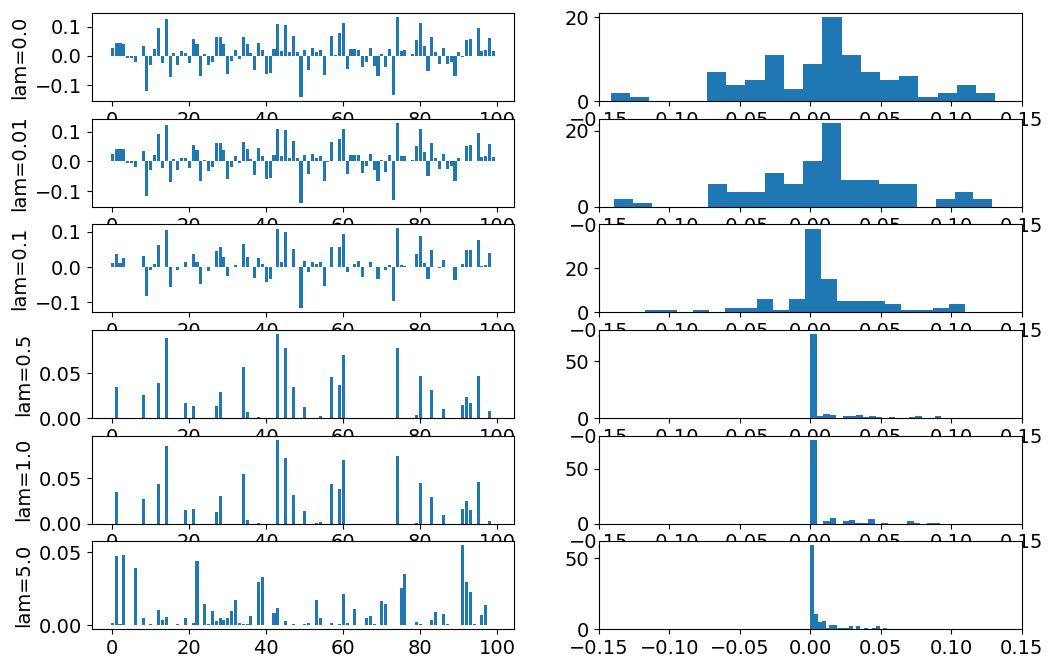

In [2]:
# Overdetermined
n = 500 # number of examples
m = 100 # number of parameters
A = np.random.rand(n,m)
b = np.random.rand(n)

xdag = np.linalg.pinv(A)@b

### begin solution

lam = np.array([0,0.01,0.1,0.5,1.,5])

def reg_norm(x,A,b,lam):
    return np.linalg.norm(A@x-b,ord=2) + lam*np.linalg.norm(x,ord=1)
### end solution

fig,axs = plt.subplots(len(lam),2)
for j in range(len(lam)):
    res = minimize(reg_norm,args=(A,b,lam[j]),x0=xdag)
    x = res.x
    axs[j,0].bar(range(m),x)
    axs[j,0].set_ylabel('lam='+str(lam[j]))
    axs[j,1].hist(x,20)
    axs[j,1].set_xlim(-0.15,0.15)
plt.show()

## Underdetermined System
Use the cells below to explore how different norms affect the outcomes for an underdetermined system, in which we have more parameters/unknowns than examples. What if you used a combination of norms?

In [7]:
# Underdetermined
n = 20
m = 100
A = np.random.rand(n,m)
b = np.random.rand(n)

## begin solution
def my_norm(x):
    return 1*np.linalg.norm(x,ord=1)
## end solution

constr = ({'type': 'eq', 'fun': lambda x:  A @ x - b})
x0 = np.random.rand(m)
res = minimize(my_norm, x0, method='SLSQP',constraints=constr)
params = res.x

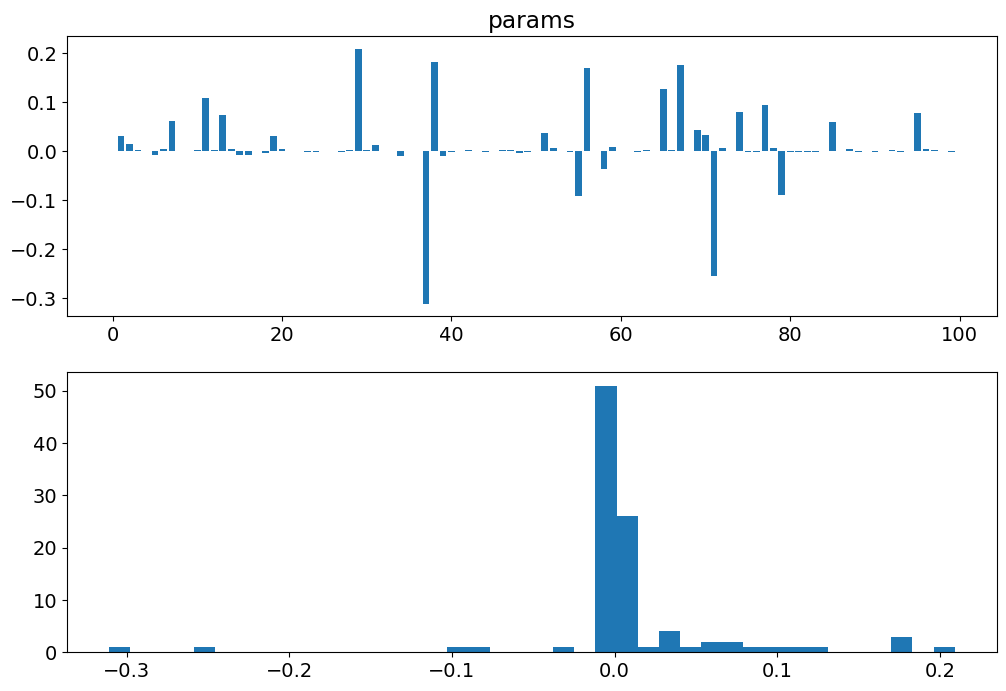

In [8]:
fig,axs = plt.subplots(2,1)
axs = axs.reshape(-1)

axs[0].bar(range(m),params)
axs[0].set_title('params')
axs[1].hist(params,40)

plt.show()